In [43]:
# Dependencies
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

In [19]:
nb_loc = os.getcwd()
zecon_dataset_loc = os.path.join(nb_loc,'datasets','zecon')
datasets = os.listdir(zecon_dataset_loc)
template = pd.DataFrame({'name': [],
                        'contents' : []})
zdata = template
# for file in datasets:
#     tokens = file.split('.')
#     file_ext = tokens[-1]
#     if file_ext == 'json':
#         contents = pd.read_json(os.path.join(zecon_dataset_loc,file))
#     elif file_ext == 'csv':
#         contents = pd.read_csv(os.path.join(zecon_dataset_loc,file))
#     name = file
    # Need to create system to store each files data separately...
    
    

In [23]:
city_time_series = pd.read_csv(os.path.join(zecon_dataset_loc,datasets[2]))

In [76]:
sample = city_time_series[['Date','RegionName',
                      'PriceToRentRatio_AllHomes','MedianSoldPrice_AllHomes',
                     'MedianSoldPricePerSqft_AllHomes']].dropna(how='any')

In [55]:
def str2unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
def convert_timescale(x):
    return x/(60*60*24*365)

In [77]:
print(sample['Date'].head())
print(sample['Date'].tail())

2346102    2010-10-31
2346109    2010-10-31
2346111    2010-10-31
2346113    2010-10-31
2346122    2010-10-31
Name: Date, dtype: object
3868199    2016-06-30
3868204    2016-06-30
3868209    2016-06-30
3868220    2016-06-30
3868222    2016-06-30
Name: Date, dtype: object


In [61]:
print(sample['Date'].head().apply(str2unix).apply(convert_timescale))
print(sample['Date'].tail().apply(str2unix).apply(convert_timescale))

0    26.346005
1    26.346005
2    26.346005
3    26.346005
4    26.346005
Name: Date, dtype: float64
4172716    47.696689
4172717    47.696689
4172718    47.696689
4172719    47.696689
4172720    47.696689
Name: Date, dtype: float64


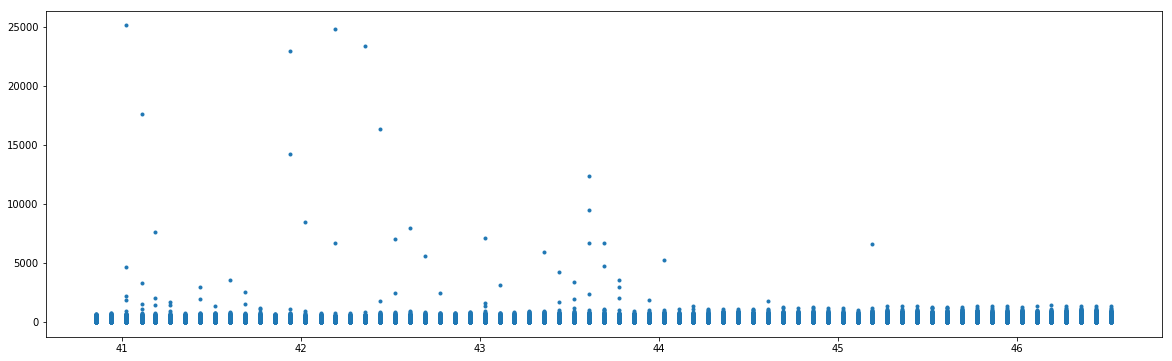

In [79]:
plt.figure(figsize=[20,6])
plt.plot(sample['Date'].apply(str2unix).apply(convert_timescale),sample['MedianSoldPricePerSqft_AllHomes'],'.')
plt.show()

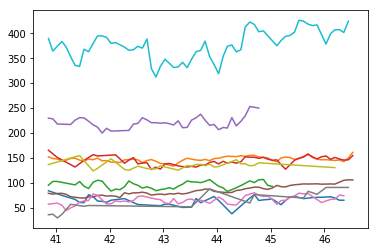

In [86]:
regions = sample['RegionName'].unique()
for region in regions[:10]:
    dates = sample.loc[sample['RegionName']==region,'Date'].apply(str2unix).apply(convert_timescale)
    price = sample.loc[sample['RegionName']==region,'MedianSoldPricePerSqft_AllHomes']
    plt.plot(dates,price)
# plt.ylim([0,500])
plt.show()

In [75]:
regions[:5]


array(['abbottstownadamspa', 'aberdeenharfordmd', 'aberdeenmonroems',
       'aberdeenmoorenc', 'abilenetaylortx'], dtype=object)

In [27]:
city_time_series.keys()

Index(['Date', 'RegionName', 'HomesSoldAsForeclosuresRatio_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop'